In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

In [3]:
X

array([[-0.63640493, -0.36870191],
       [-0.24465976, -0.73659196],
       [-0.46597138, -1.06687743],
       [-0.70999784, -0.40841948],
       [ 0.70232238, -0.51730147],
       [-0.49776571,  0.76955129],
       [-0.31914906, -0.84899624],
       [-0.57839322, -0.49081236],
       [-0.53350227,  0.58056527],
       [-0.24733259,  0.73011595],
       [ 0.41030774, -0.73075986],
       [ 0.17181003, -0.92504802],
       [ 0.65917045,  0.62120588],
       [ 0.87625577,  0.12510879],
       [ 0.81946243, -0.01347859],
       [-0.47960986, -0.7880243 ],
       [-0.90187751, -0.70895455],
       [ 0.74827659, -0.55976747],
       [-0.74875324, -0.37153443],
       [ 0.23161178,  1.01205842],
       [ 0.81387506,  0.22821311],
       [-0.92169575,  0.20310719],
       [ 0.74650434, -0.35861224],
       [ 0.01330079,  0.68169193],
       [-0.72651409,  0.58630948],
       [-0.33930852, -1.0080984 ],
       [ 0.49009938, -0.62509577],
       [-0.9539309 , -0.33410313],
       [ 0.6927241 ,

<Axes: >

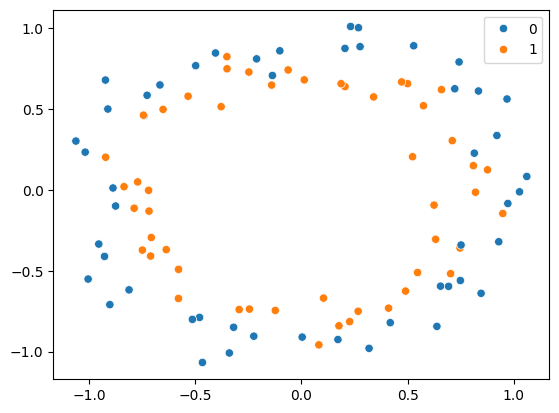

In [4]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=2)

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

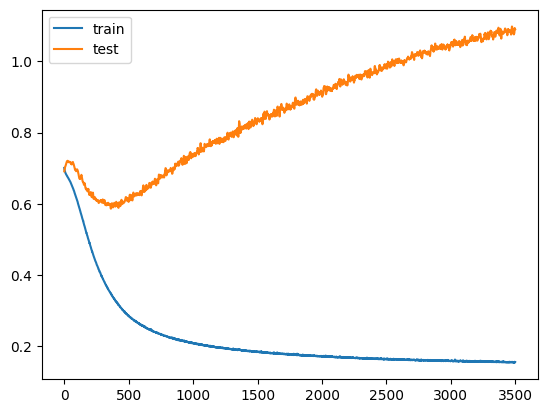

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

we can see after around 300 epochs loss is increasing. model is overfitting 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 212us/step


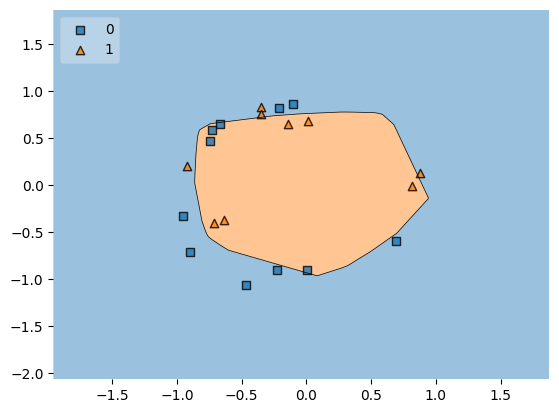

In [10]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

# EARLY STOPPING

In [28]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
callback = EarlyStopping(
    monitor = 'val_loss', # what needs to be noticed increasing(loss) or decreasing(accuracy)
    min_delta = 0,
    patience = 90, # if 20 epochs tak consistently badhega toh stop kardo 
    verbose = 1, # result value at the end
    mode = 'auto',
    baseline = None, # training will stop if monitored metrics stops decreasing and reaches this baseline
    restore_best_weights = False # whether to store weights from the epoch where best value is monitored
)

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5070 - loss: 0.6948 - val_accuracy: 0.6000 - val_loss: 0.6873
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4672 - loss: 0.6927 - val_accuracy: 0.5500 - val_loss: 0.6911
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5273 - loss: 0.6899 - val_accuracy: 0.4000 - val_loss: 0.6949
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5344 - loss: 0.6890 - val_accuracy: 0.3500 - val_loss: 0.6985
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5781 - loss: 0.6896 - val_accuracy: 0.3500 - val_loss: 0.7015
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5922 - loss: 0.6845 - val_accuracy: 0.3500 - val_loss: 0.7042
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5781 - loss: 0.6857 - val_accuracy: 0.4000 - val_loss: 0.7061
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6016 - loss: 0.6811 - val_accuracy: 0.4500 - v

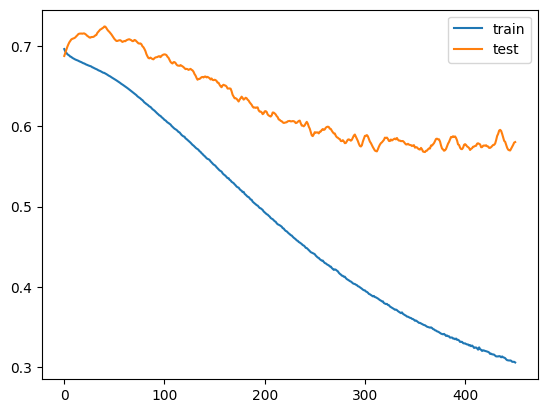

In [32]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

we can loss stabalising for a while and then rising gradually